In [ ]:
from google.colab import files
import io

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Calling the Liabraries

import yfinance as yf
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential  # layer by layer
from keras.layers import Dense, LSTM # Dense - helps in carrying neurons from one layer to another  # LSTM - Recurrent Neural Networks and it has loops to think from scratch
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
# Typing the Symbol

stock = input('Enter Tiker : ')

Enter Tiker : LT.NS


#EDA

In [ ]:
# Scraping the information

Stock = yf.Ticker(stock)
a = [(Stock.info.keys())]
a

[dict_keys(['zip', 'sector', 'longBusinessSummary', 'city', 'phone', 'country', 'companyOfficers', 'website', 'maxAge', 'address1', 'fax', 'industry', 'address2', 'ebitdaMargins', 'profitMargins', 'grossMargins', 'operatingCashflow', 'revenueGrowth', 'operatingMargins', 'ebitda', 'targetLowPrice', 'recommendationKey', 'grossProfits', 'freeCashflow', 'targetMedianPrice', 'currentPrice', 'earningsGrowth', 'currentRatio', 'returnOnAssets', 'numberOfAnalystOpinions', 'targetMeanPrice', 'debtToEquity', 'returnOnEquity', 'targetHighPrice', 'totalCash', 'totalDebt', 'totalRevenue', 'totalCashPerShare', 'financialCurrency', 'revenuePerShare', 'quickRatio', 'recommendationMean', 'exchange', 'shortName', 'longName', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'isEsgPopulated', 'gmtOffSetMilliseconds', 'quoteType', 'symbol', 'messageBoardId', 'market', 'annualHoldingsTurnover', 'enterpriseToRevenue', 'beta3Year', 'enterpriseToEbitda', '52WeekChange', 'morningStarRiskRating', 'forwardEps'

In [ ]:
# Checking the exchange

Stock.info['exchange']

'NSI'

In [ ]:
Stock.info['exchangeTimezoneName']

'Asia/Kolkata'

In [ ]:
Stock.info['currentPrice']

1581.15

In [ ]:
hg = yf.download(stock)

[*********************100%***********************]  1 of 1 completed


In [ ]:
hg.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4958.000000,4958.000000,4958.000000,4958.000000,4958.000000,4.958000e+03
mean,755.898981,765.467767,745.293667,754.933072,681.686081,3.622254e+06
std,474.402017,478.952395,469.465452,473.869447,463.807196,2.620623e+06
min,34.777779,35.266666,16.666666,34.955555,27.106556,0.000000e+00
25%,333.299995,341.288895,325.311111,332.025002,273.157242,2.001752e+06
50%,728.533325,737.333313,717.911102,727.311127,616.322388,2.902030e+06
75%,1113.333374,1124.266693,1098.641632,1111.466675,980.753448,4.475624e+06
max,2075.649902,2078.550049,2042.000000,2069.399902,2069.399902,4.367629e+07


In [ ]:
hg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4958 entries, 2002-07-01 to 2022-06-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4958 non-null   float64
 1   High       4958 non-null   float64
 2   Low        4958 non-null   float64
 3   Close      4958 non-null   float64
 4   Adj Close  4958 non-null   float64
 5   Volume     4958 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 271.1 KB


In [ ]:
# Extracting the historical data

hist = Stock.history(period="108Mo")


In [ ]:
# Showing latest 5 values in the form of table

hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-06-03,1657.949951,1673.699951,1644.949951,1652.050049,2928263,0.0,0.0
2022-06-06,1652.150024,1662.300049,1634.099976,1640.199951,1538005,0.0,0.0
2022-06-07,1630.000000,1638.400024,1586.099976,1589.449951,2157491,0.0,0.0
2022-06-08,1595.000000,1607.800049,1570.099976,1584.550049,2122442,0.0,0.0
2022-06-09,1556.199951,1584.000000,1556.199951,1581.000000,855535,0.0,0.0


In [ ]:
# Checking the rows and columns of the data

hist.shape

(2219, 7)

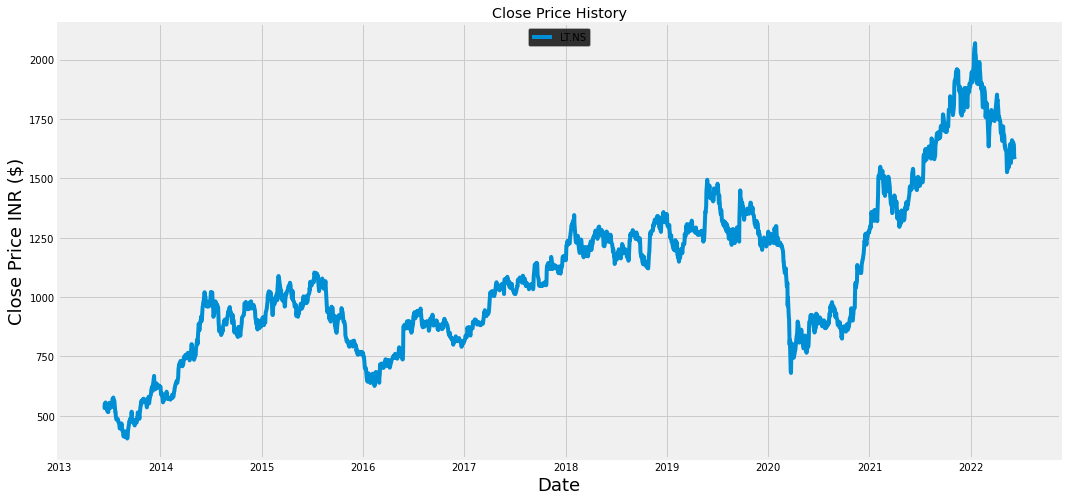

In [ ]:
# Plotting the graph of prev. closing price

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(hist['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR ($)', fontsize=18)
plt.legend([stock], loc='upper center', fontsize=10, facecolor ='black')
plt.show()

In [ ]:
hist.to_csv('yahoo.csv')

In [ ]:
import plotly.graph_objects as go 

import pandas as pd
from datetime import datetime


df = pd.read_csv('yahoo.csv')
candlestick = go.Candlestick(x=df['Date'], open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'])
fig = go.Figure(data=[candlestick])
fig.show()

In [ ]:
hist2 = Stock.history(period="15Mo")
hist2.to_csv('yahoo1.csv')

f = pd.read_csv('yahoo1.csv')
candlestick = go.Candlestick(x=f['Date'], open=f['Open'], high=f['High'], low=f['Low'], close=f['Close'])
fig = go.Figure(data=[candlestick])
fig.show()


In [ ]:
hist3= Stock.history(period="5Mo")
hist3.to_csv('yahoo2.csv')

g = pd.read_csv('yahoo2.csv')
candlestick = go.Candlestick(x=g['Date'], open=g['Open'], high=g['High'], low=g['Low'], close=g['Close'])
fig = go.Figure(data=[candlestick])
fig.show()

In [ ]:
hist4 = Stock.history(period="60d")
hist4.to_csv('yahoo3.csv')

h = pd.read_csv('yahoo3.csv')
candlestick = go.Candlestick(x  =   h['Date'],
                             open = h['Open'],
                             high = h['High'], 
                             low  = h['Low'],
                             close= h['Close'])
fig = go.Figure(data=[candlestick])
fig.show()

In [ ]:

hist5 = Stock.history(period="1d")
hist5.to_csv('yahoo4.csv')

t = pd.read_csv('yahoo4.csv')
candlestick = go.Candlestick(x  =   t['Date'],
                             open = t['Open'],
                             high = t['High'], 
                             low  = t['Low'],
                             close= t['Close'])
fig = go.Figure(data=[candlestick])
fig.show()

In [ ]:
   '''       import finplot as fplt

          A = "HDFCBANK.NS"

          dfn = yf.download(A)

          ax = fplt.create_plot(A)

          fplt.candlestick_ochl(dfn[['Open', 'Close', 'High', 'Low']], ax=ax)
          fplt.plot(df['Close'].rolling(200).mean(), ax=ax, legend='SMA 200')
          fplt.plot(df['Close'].rolling(50).mean(), ax=ax, legend='SMA 50')
          fplt.plot(df['Close'].rolling(20).mean(), ax=ax, legend='SMA 20')

          fplt.volume_ocv(df[['Open', 'Close', 'Volume']], ax=ax.overlay())

          fplt.show()'''

'       import finplot as fplt\n\n       A = "HDFCBANK.NS"\n\n       dfn = yf.download(A)\n\n       ax = fplt.create_plot(A)\n\n       fplt.candlestick_ochl(dfn[[\'Open\', \'Close\', \'High\', \'Low\']], ax=ax)\n       fplt.plot(df[\'Close\'].rolling(200).mean(), ax=ax, legend=\'SMA 200\')\n       fplt.plot(df[\'Close\'].rolling(50).mean(), ax=ax, legend=\'SMA 50\')\n       fplt.plot(df[\'Close\'].rolling(20).mean(), ax=ax, legend=\'SMA 20\')\n\n       fplt.volume_ocv(df[[\'Open\', \'Close\', \'Volume\']], ax=ax.overlay())\n\n       fplt.show()'

In [ ]:
# Filtering the index value as well as closing price

data = hist.filter(['Close'])

In [ ]:
# Displaying the top 5 values in the form of table from the starting time

data.tail(10)

,Close
Date,
2022-05-27,1600.300049
2022-05-30,1660.849976
2022-05-31,1654.500000
2022-06-01,1648.000000
2022-06-02,1637.150024
2022-06-03,1652.050049
2022-06-06,1640.199951
2022-06-07,1589.449951
2022-06-08,1584.550049


In [ ]:
data.size

2219

In [ ]:
# returns a list of all the values available in the data (variable name) dictionary the values have been stored in a reversed manner.

dataset=data.values

In [ ]:
dataset.shape


(2219, 1)

In [ ]:
# math function is called for mathematical functions and 0.65  s muliplied as 65% data is used for training the data (2218 * 65% = 1442)

training = math.ceil(len(dataset) * 0.65)
training

1443

In [ ]:
# Scaling the data between 0 and 1 to give a common base

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.07957546],
       [0.07925388],
       [0.07777259],
       ...,
       [0.71172296],
       [0.70877988],
       [0.70664758]])

In [ ]:
# creating empty columns to enter the values (Reconstruction of training set)

train_data = scaled_data[0:training,:]
x_train = []
y_train = []

In [ ]:
# Training the data as it, the model go 60 days back to make predictions

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.07957546, 0.07925388, 0.07777259, 0.07711809, 0.0879119 ,
       0.09123042, 0.08724586, 0.08723439, 0.07758888, 0.07689997,
       0.06812708, 0.07104369, 0.06765637, 0.06716252, 0.0803678 ,
       0.0904151 , 0.08532828, 0.07686554, 0.07904719, 0.08057441,
       0.07925388, 0.08505263, 0.08169977, 0.08941039, 0.09996877,
       0.10372368, 0.09161517, 0.09056445, 0.096455  , 0.09256235,
       0.06758737, 0.06744961, 0.05582332, 0.05134506, 0.0483825 ,
       0.04679785, 0.0498121 , 0.04886478, 0.0481241 , 0.04300856,
       0.03735903, 0.03098607, 0.02538823, 0.02573274, 0.03186456,
       0.03826052, 0.03675603, 0.02206059, 0.01511527, 0.01333084,
       0.00524832, 0.01049673, 0.01560512, 0.01817683, 0.00393627,
       0.00372634, 0.01014683, 0.01054919, 0.01163386, 0.        ])]
[0.0016094902846953418]



In [ ]:
# Converting the data into array form

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshaping the data to avoid error (2D to 3D)

x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1383, 60, 1)

In [ ]:
# Initiating the Model using Sequential() function (ANN Model type as it also have layers)
# adding layer using LSTM and making conection with another layer using Dense
# 2-layer model - LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# using adam optimizer to compile the data (to be in accordance with requirements)

model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
# Fitting the model 
# Creating batch as to divide the data equally
# allowing it to pass through neural networks using epochs

model.fit(x_train, y_train, batch_size = 30, epochs = 20)

Epoch 1/20
47/47 [==============================] - 9s 105ms/step - loss: 0.0133
Epoch 2/20
47/47 [==============================] - 5s 99ms/step - loss: 7.0816e-04
Epoch 3/20
47/47 [==============================] - 5s 109ms/step - loss: 4.5767e-04
Epoch 4/20
47/47 [==============================] - 6s 121ms/step - loss: 4.4889e-04
Epoch 5/20
47/47 [==============================] - 5s 103ms/step - loss: 4.3466e-04
Epoch 6/20
47/47 [==============================] - 5s 106ms/step - loss: 4.1538e-04
Epoch 7/20
47/47 [==============================] - 3s 57ms/step - loss: 4.0282e-04
Epoch 8/20
47/47 [==============================] - 3s 58ms/step - loss: 3.9868e-04
Epoch 9/20
47/47 [==============================] - 3s 56ms/step - loss: 3.9325e-04
Epoch 10/20
47/47 [==============================] - 3s 55ms/step - loss: 3.5822e-04
Epoch 11/20
47/47 [==============================] - 3s 54ms/step - loss: 3.8097e-04
Epoch 12/20
47/47 [==============================] - 2s 53ms/step - loss:

In [ ]:
# Making predictions using past 60 days data

test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
# Converting the dataframe into an array

x_test = np.array(x_test)

In [ ]:
# Reshaping the data to avoid error by converting 2D data to 3D data

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test

array([[[0.49626374],
        [0.48872825],
        [0.48889696],
        ...,
        [0.53385623],
        [0.52221568],
        [0.52190649]],

       [[0.48872825],
        [0.48889696],
        [0.48546667],
        ...,
        [0.52221568],
        [0.52190649],
        [0.51518646]],

       [[0.48889696],
        [0.48546667],
        [0.47989946],
        ...,
        [0.52190649],
        [0.51518646],
        [0.52218775]],

       ...,

       [[0.7726879 ],
        [0.79506173],
        [0.79533206],
        ...,
        [0.74037352],
        [0.74932307],
        [0.74220543]],

       [[0.79506173],
        [0.79533206],
        [0.80620363],
        ...,
        [0.74932307],
        [0.74220543],
        [0.71172296]],

       [[0.79533206],
        [0.80620363],
        [0.80422149],
        ...,
        [0.74220543],
        [0.71172296],
        [0.70877988]]])

In [ ]:
# making predictions on x_test using .preict function

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Checking the error rate by RMSE (squaring the residuals, then taking average and then sq rooting them)

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

7.92192675403713

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



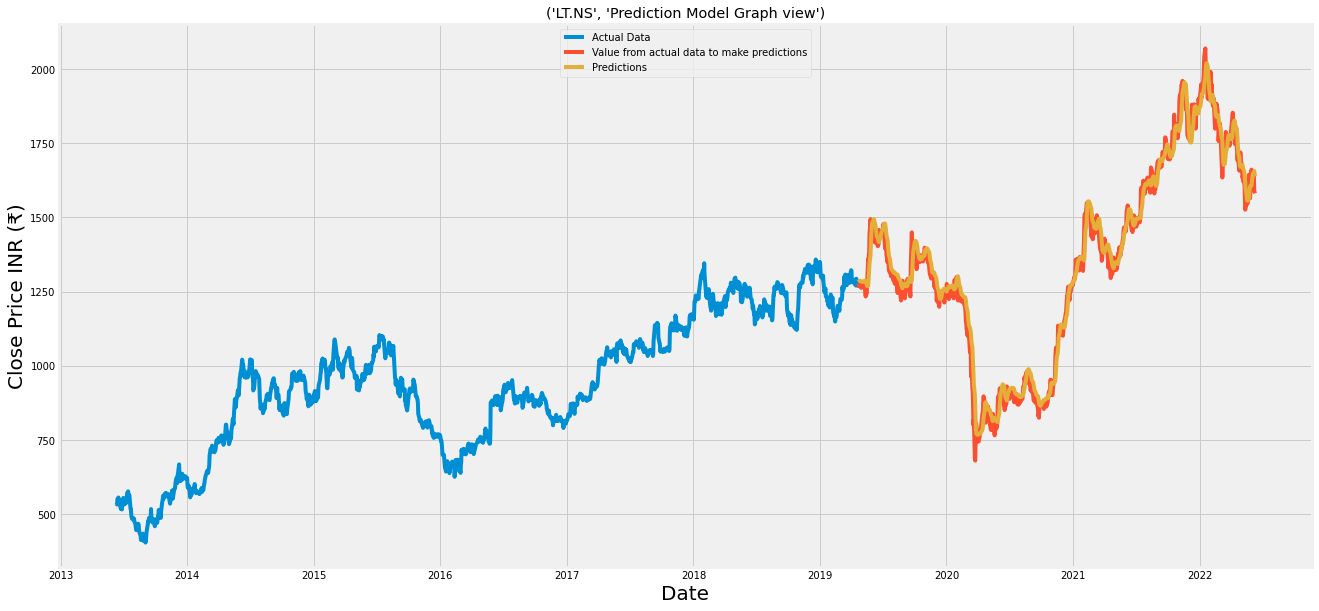

In [ ]:
# Plotting the data

train = data[:training]
valid = data[training:]
valid['Predictions'] = predictions
STOCK = (stock, 'Prediction Model Graph view')

plt.figure(figsize=(20,10))
plt.title(STOCK)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Close Price INR (₹)', fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Actual Data','Value from actual data to make predictions','Predictions'], loc='upper center', fontsize=10)
plt.show()

In [ ]:
# Checking the actual values with the predicted values mannually of the latest data according to the time

valid.tail(10)

,Close,Predictions
Date,,
2022-05-27,1600.300049,1605.546753
2022-05-30,1660.849976,1606.867065
2022-05-31,1654.500000,1616.397095
2022-06-01,1648.000000,1628.407104
2022-06-02,1637.150024,1639.437012
2022-06-03,1652.050049,1646.933838
2022-06-06,1640.199951,1653.372681
2022-06-07,1589.449951,1656.532593
2022-06-08,1584.550049,1650.262695


In [ ]:
# Calculating the returns on actual closing pice and predicted closing price using .shift function (FORMULA = current price - prev. price/prev. price)

valid['Returns on Actual Closing Price(₹)'] = ((valid['Close'] - valid['Close'].shift(1))/(valid['Close'].shift(1)))
valid['Returns on Predicted Closing Price(₹)'] = ((valid['Predictions'] - valid['Predictions'].shift(1))/(valid['Predictions'].shift(1)))
valid['Diff_returns_Actual_vs_returns_Pred_Closing_Price(₹)'] = (((valid['Close'] - valid['Close'].shift(1))/(valid['Close'].shift(1))) - ((valid['Predictions'] - valid['Predictions'].shift(1))/(valid['Predictions'].shift(1))))
valid['Diff_Actual_vs_Pred Closing Price(₹)'] = (valid['Close'] - valid['Predictions'])
valid.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,Close,Predictions,Returns on Actual Closing Price(₹),Returns on Predicted Closing Price(₹),Diff_returns_Actual_vs_returns_Pred_Closing_Price(₹),Diff_Actual_vs_Pred Closing Price(₹)
Date,,,,,,
2022-06-03,1652.050049,1646.933838,0.009101,0.004573,0.004528,5.116211
2022-06-06,1640.199951,1653.372681,-0.007173,0.003910,-0.011083,-13.172729
2022-06-07,1589.449951,1656.532593,-0.030941,0.001911,-0.032853,-67.082642
2022-06-08,1584.550049,1650.262695,-0.003083,-0.003785,0.000702,-65.712646
2022-06-09,1581.000000,1638.645142,-0.002240,-0.007040,0.004799,-57.645142


# Re-doing a few steps to get tomorrow's predicted price for intra-day trading



In [ ]:
quote = hist
new_df = quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)

print('Tomorrow(s) Predicted price for', stock, 'will be :', pred_price)

Tomorrow(s) Predicted price for LT.NS will be : [[1624.7577]]


In [ ]:
pip install ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tkinter import *
from tkinter import ttk

In [ ]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['AAPL.Open'],
                high=df['AAPL.High'],
                low=df['AAPL.Low'],
                close=df['AAPL.Close'])])

fig.show()